# To analyze the effect of different aspects of movies that have an effect on it's star rating

In [167]:
#Importing necessary libraries for the analysis

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/reelview-top-movie-lists-reviews/ReelView.csv


In [168]:
#importing the csv file into a data frame df

df = pd.read_csv("/kaggle/input/reelview-top-movie-lists-reviews/ReelView.csv")

In [169]:
#First 5 rows of the dataset

print(df.head)

<bound method NDFrame.head of                      title  stars_rating  run_time  release_date  \
0      Terms of Endearment           2.5     132.0        1983.0   
1                     1917           3.5     110.0        2019.0   
2        Spies in Disguise           2.0     101.0        2019.0   
3               Just Mercy           3.0     136.0        2019.0   
4             Little Women           3.0     135.0        2019.0   
...                    ...           ...       ...           ...   
3985  Music of Chance, The           3.0     100.0        1993.0   
3986           Ultraviolet           1.0      85.0        2006.0   
3987               Speed 2           1.5     125.0        1997.0   
3988               Ex, The           2.0      93.0        2007.0   
3989                 Venus           3.0      95.0        2006.0   

                               mpaa_rating            genre  \
0                Profanity, Sexual Content     Drama/Comedy   
1              Violence, Di

In [170]:
#Extracting the data types of each column in the dataset

print(df.dtypes)

title            object
stars_rating    float64
run_time        float64
release_date    float64
mpaa_rating      object
genre            object
director         object
cast             object
dtype: object


In [171]:
# dimensions of the dataset

print("No. of rows is", df.shape[0], "and No. of columns is", df.shape[1])

No. of rows is 3990 and No. of columns is 8


### In this analysis, I will make the assumption that the movie **title** and **cast** does not impact the rating of the movie itself.

### However even though it is possible that **directors** can affect the movie ratings, in my opinion there is too little data to perform an analysis on each director affects the movie ratings simply becuase there are too many directors mentioned in the dataset (1946 directors).

### Thus none of the above mentioned variables will not be taken into consideration in the analysis.

---

## **1. Checking which mpaa_ratings get the highest ratings**

In [172]:
#Extracting the different demographic ratings in the "mpaa_rating" column

mpaa = set()
#print(df["mpaa_rating"])

for i in df["mpaa_rating"].dropna():
    start = 0
    for j in range(len(i)):
        if i[j] == "," or j == len(i) - 1:
            sr = i[start:j+1].lower()
            sr1 = ""
            for k in sr:
                if k.isalpha() or k in [" ", "/", "-", "&", ";"]:
                    sr1 += k
            if sr1 == "vilence":
                mpaa.add("violence")
            else:
                mpaa.add(sr1.strip())
            start = j
print(mpaa)

{'', 'graphic sexual content', 'intense action', 'bloody horror', 'brief nudity', 'mild profanity', 'naked minion butts', 'minion nudity', 'partial nudity', 'gore', 'painful dialogue', 'sci-fi action and violence', 'war violence', 'more violence', 'profantiy', 'fantasy violence', 'dino violence', 'drug use', 'puppet', 'violence', 'destruction', 'frequent profanity', 'intense peril', 'racial violence', 'nude images', 'horror action/violence', 'racial epithets', 'nothing objectionable', 'mild sexual content', 'racism', 'rude behavior', 'explicit sexual content', 'sex', 'intense horror', 'spousal abuse', 'sexual content', 'nudity', 'graphic nudity', 'r', 'brief frontal female nudity', 'bloody mayhem', 'monster mayhem', 'adult content', 'grisly violence', 'comic book monstrosities', 'torture', 'disturbing content', 'suggestive material', 'scenes of peril', 'mature themes', 'animal violence', 'bad acting', 'sexual innuendo', 'instances of race-related bigotry', 'terror', 'brief rear female 

In [173]:
#There is unclean and repeated rating terms in the above, so they shall be removed from the list
#The rest of the rating terms are added to a list for reference

mpaa_ratings = []

for i in mpaa:
    if i not in ['distrubing content', 'profantiy', 'r', 'sexual situations', '', "vilence"]:
        mpaa_ratings.append(i)
    
print("Total number of mpaa rating terms is:", len(mpaa_ratings))

Total number of mpaa rating terms is: 113


### Out of simplicity, the columns not included in the analysis are TITLE and CAST

In [174]:
# Creating a new dataframe that has no nulls in the mpaa_ratings column

df1 = df[~df['mpaa_rating'].isna()]

In [175]:
#creating a dictionary that lists the count and sum of ratings of all movies that feature each mpaa rating category

avg_rating_mpaa = {}

for i in mpaa_ratings:
    movs = set()
    for j in df1.index:
        if i.lower() in df1["mpaa_rating"][j].lower():
            if i not in avg_rating_mpaa.keys():
                avg_rating_mpaa[i] = [df1["stars_rating"][j], 1]
            else:
                avg_rating_mpaa[i] = [avg_rating_mpaa[i][0] + df1["stars_rating"][j], avg_rating_mpaa[i][1] + 1]
print(avg_rating_mpaa)
    

{'graphic sexual content': [5.0, 2], 'intense action': [9.0, 3], 'bloody horror': [2.0, 1], 'brief nudity': [200.5, 76], 'mild profanity': [5.0, 3], 'naked minion butts': [3.0, 1], 'minion nudity': [2.5, 1], 'partial nudity': [22.0, 8], 'gore': [172.5, 68], 'painful dialogue': [1.0, 1], 'sci-fi action and violence': [3.0, 1], 'war violence': [34.5, 11], 'more violence': [2.0, 1], 'fantasy violence': [6.0, 2], 'dino violence': [5.0, 2], 'drug use': [5.0, 2], 'puppet': [2.5, 1], 'violence': [5828.5, 2175], 'destruction': [2.5, 1], 'frequent profanity': [2.5, 1], 'intense peril': [2.5, 1], 'racial violence': [2.5, 1], 'nude images': [3.0, 1], 'horror action/violence': [2.5, 1], 'racial epithets': [9.5, 3], 'nothing objectionable': [298.0, 99], 'mild sexual content': [3.0, 1], 'racism': [3.5, 1], 'rude behavior': [3.0, 1], 'explicit sexual content': [3.0, 1], 'sex': [5262.5, 1982], 'intense horror': [3.5, 1], 'spousal abuse': [3.0, 1], 'sexual content': [2825.5, 1083], 'nudity': [3020.5, 1

In [176]:
#Creating a new dictionary that stores the average ratings of each mpaa rating category

avg_rating_mpaa_dataframe = {}

for i in avg_rating_mpaa.keys():
    avg_rating_mpaa_dataframe[i] = float(avg_rating_mpaa[i][0]) / float(avg_rating_mpaa[i][1])

#avg_rating_mpaa_dataframe

In [177]:
#converting the above dictionary to a data frame and displaying the data frame in descending order of average ratings

mpaa_ratings_dataframe = pd.DataFrame.from_dict({"MPAA Rating": avg_rating_mpaa_dataframe.keys(), 
                                                 "Average Star Rating": avg_rating_mpaa_dataframe.values()})
mpaa_ratings_dataframe.sort_values(by="Average Star Rating", ascending=False)

,MPAA Rating,Average Star Rating
27,racism,3.50
76,sensuality,3.50
31,intense horror,3.50
109,implied violence,3.50
71,disturbing themes,3.25
...,...,...
9,painful dialogue,1.00
88,bloody violence,1.00
61,graphic violence,1.00
111,rude humor,1.00


### From the above table, we can see that the movie ratings that have the highest average ratings are racism, implied violence, sensuality, intense horror and disturbing themes. 

### A graph that demonstrates this is shown below:

In [178]:
# Top 10 highest average ratings grouped by mpaa rating category

mpaa_ratings_dataframe.sort_values(by="Average Star Rating", ascending=False).iloc[:10,:]

,MPAA Rating,Average Star Rating
27,racism,3.500000
76,sensuality,3.500000
31,intense horror,3.500000
109,implied violence,3.500000
71,disturbing themes,3.250000
105,mature content,3.250000
24,racial epithets,3.166667
11,war violence,3.136364
46,mature themes,3.062500
25,nothing objectionable,3.010101


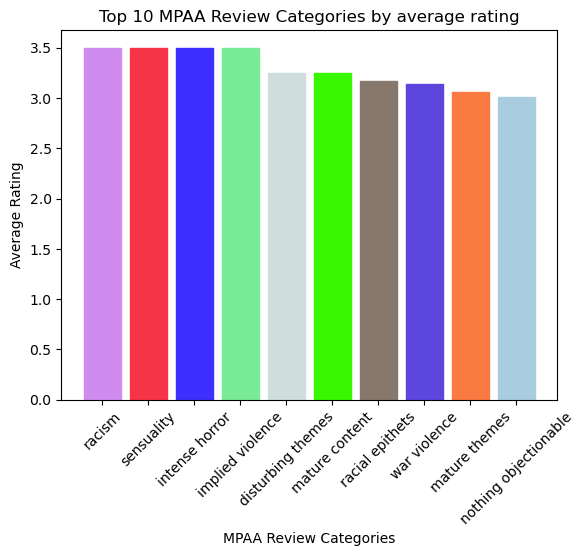

In [181]:
# Top 10 highest average ratings grouped by mpaa rating category visualized as a bar chart

mpaa_ratings_dataframe_top10 = mpaa_ratings_dataframe.sort_values(by="Average Star Rating", ascending=False).iloc[:10,:]

bars = plt.bar(mpaa_ratings_dataframe_top10["MPAA Rating"], mpaa_ratings_dataframe_top10["Average Star Rating"])

hexadecimal_alphabets = '0123456789ABCDEF'
colors = ["#" + ''.join([random.choice(hexadecimal_alphabets) for j in range(6)]) for i in range(10)]

for i in range(len(colors)):
   bars[i].set_color(colors[i])

plt.title("Top 10 MPAA Review Categories by average rating")
plt.xlabel("MPAA Review Categories")
plt.ylabel("Average Rating")
plt.xticks(rotation = 45)
plt.show()

### To compare this with the number of movies involving each mpaa rating category:

In [182]:
# Using an earlier dictionary to find the count of movies featuring each mpaa rating category 
# and converting them to a data frame to show the 10 most frequent mpaa rating categories.

mov_count = []

for i in avg_rating_mpaa_dataframe.keys():
    mov_count.append(avg_rating_mpaa[i][1])
    
mpaa_ratings_count_dataframe = pd.DataFrame.from_dict({"MPAA Rating": avg_rating_mpaa_dataframe.keys(), 
                                                 "Movie count": mov_count})

mpaa_ratings_count_dataframe.sort_values(by="Movie count", ascending=False).iloc[:10,:]

,MPAA Rating,Movie count
75,profanity,2735
17,violence,2175
30,sex,1982
34,nudity,1103
33,sexual content,1083
68,sexual situation,892
86,drugs,349
46,mature themes,144
25,nothing objectionable,99
3,brief nudity,76


### From the above table, it can be concluded that from all the movies released within the recordings of this dataset, most movies seem to have MPAA review categories of **profanity** and **violence**.

### Comparing the above table with the table of the top 10 reviewed mpaa review categories, movies with
### * _**"mature themes"**_ and 
### * _**"nothing objectionable"**_ 
### appear in both tables which shows that even with a large number of movies they have good ratings.

### **It can thus be concluded that the above rating categories have the highest consistent ratings**
#### (Here, I have assumed that the MPAA rating categories distributed throughout each movie is reasonable distributed, even though most of these categories have less than 10 movies)

---

## **2. Checking how runtime affects ratings**

In [183]:
#Creating a new data frame that has no null values in the runtime

df2 = df[~df['run_time'].isna()]

In [184]:
''' 
Let there be four categories of runtime: 
    under an hour, 
    under 1.5 hours,
    under 2 hours,
    over 2 hours
    
A new list shall be made that creates a categorical version of rutime according to the above.
'''

runtime = df["run_time"]
runtime_cat = []

for i in runtime:
    if i < 60:
        runtime_cat.append("Under_1_hour")
    elif i < 90:
        runtime_cat.append("Under_3/2_hours")
    elif i < 120:
        runtime_cat.append("Under_2_hours")
    elif i >= 120:
        runtime_cat.append("Over_2_hours")
    else:
        runtime_cat.append(i)

In [185]:
print(len(runtime_cat), df.shape)

3990 (3990, 8)


Text(0.5, 1.0, 'Distribution of movie runtime over different movies')

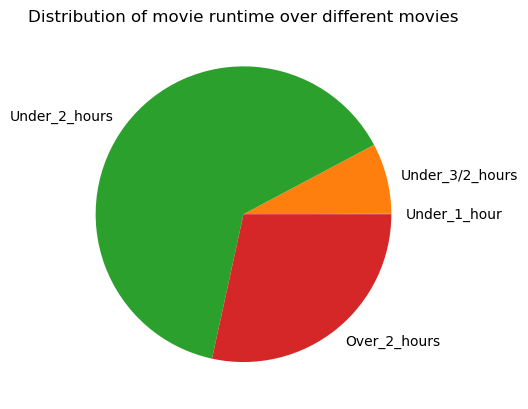

In [186]:
# Showing the distribution of each category of runtime in the list

plt.pie([runtime_cat.count("Under_1_hour"), 
         runtime_cat.count("Under_3/2_hours"), 
         runtime_cat.count("Under_2_hours"), 
         runtime_cat.count("Over_2_hours")],
       labels = ["Under_1_hour", "Under_3/2_hours", "Under_2_hours", "Over_2_hours"])
plt.title("Distribution of movie runtime over different movies")

### We can see that most movies are made with a runtime between 1.5 to 2 hours, while the least number of movies are made under an hour.


In [187]:
# Now we can check the average rating for each runtime category

runt = {}

for i in df2.index:
    if runtime_cat[i] not in runt.keys():
        runt[runtime_cat[i]] = [df2["stars_rating"][i], 1]
    else:
        runt[runtime_cat[i]] = [df2["stars_rating"][i] + runt[runtime_cat[i]][0], runt[runtime_cat[i]][1] + 1]

runt

{'Over_2_hours': [3318.5, 1133],
 'Under_2_hours': [6706.5, 2544],
 'Under_3/2_hours': [778.0, 308],
 'Under_1_hour': [6.0, 2]}

In [188]:
# calculating the average for each category

runt_avg = {}
for i in runt.keys():
    runt_avg[i] = float(runt[i][0]) / float(runt[i][1])

runt_avg

{'Over_2_hours': 2.9289496910856134,
 'Under_2_hours': 2.636202830188679,
 'Under_3/2_hours': 2.5259740259740258,
 'Under_1_hour': 3.0}

In [189]:
#converting the above dictionary to a data frame and displaying the data frame in descending order of average ratings

runtime_dataframe = pd.DataFrame.from_dict({"Runtime Category": runt_avg.keys(), 
                                                 "Average Star Rating": runt_avg.values()})
runtime_dataframe.sort_values(by="Average Star Rating", ascending=False)

,Runtime Category,Average Star Rating
3,Under_1_hour,3.000000
0,Over_2_hours,2.928950
1,Under_2_hours,2.636203
2,Under_3/2_hours,2.525974


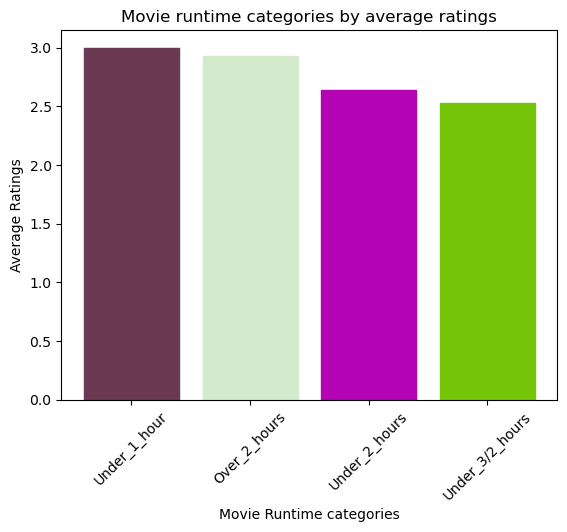

In [190]:
# Average ratings grouped by runtime category visualized as a bar chart

runt_order = runtime_dataframe.sort_values(by="Average Star Rating", ascending=False)

bars = plt.bar(runt_order["Runtime Category"], runt_order["Average Star Rating"])

hexadecimal_alphabets = '0123456789ABCDEF'
colors = ["#" + ''.join([random.choice(hexadecimal_alphabets) for j in range(6)]) for i in range(4)]

for i in range(len(colors)):
   bars[i].set_color(colors[i])

plt.xlabel("Movie Runtime categories")
plt.ylabel("Average Ratings")
plt.title("Movie runtime categories by average ratings")
plt.xticks(rotation = 45)
plt.show()

### From the above chart, we can see that there is negligible difference in the average ratings of each runtime category, but ever still, we can check the number of movies under each category to see which category has the most consistent ratings.

In [191]:
# Using an earlier dictionary to find the count of movies featuring each runtime category 
# and converting them to a data frame to show the most frequent runtime categories.

runt_count = []

for i in runt.keys():
    runt_count.append(runt[i][1])
    
runt_count_dataframe = pd.DataFrame.from_dict({"Runtime Category": runt.keys(), 
                                                 "Movie count": runt_count})

runt_count_dataframe.sort_values(by="Movie count", ascending=False)

,Runtime Category,Movie count
1,Under_2_hours,2544
0,Over_2_hours,1133
2,Under_3/2_hours,308
3,Under_1_hour,2


### From the above table, we can see that even though there are more than half the movies in the dataset that are under 2 hours, they have the average rating of 2.636203, and yet still the movies that are over 2 hours long have 1133  movies with an averae rating of 2.928950. 

### **Since there is not many movies to account for for movies under 1.5 hours, no effective conclusion can be made that states that the runtime affects the ratings of a movie.**

---

## **3. Checking how the Release year affects movie ratings**

### It must be noted that this data field has many NaN values

In [192]:
years = df["release_date"]

In [193]:
#Creating a new data frame that has no null values in the release date

df3 = df[~df['release_date'].isna()]

### Distribution of movies over each year

In [194]:
years_mov_count = {}
for i in df3.index:
    if df3["release_date"][i] not in years_mov_count.keys():
        years_mov_count[df3["release_date"][i]] = [df3["stars_rating"][i], 1]
    else:
        years_mov_count[df3["release_date"][i]] = [df3["stars_rating"][i] + years_mov_count[df3["release_date"][i]][0], years_mov_count[df["release_date"][i]][1] + 1]

print(years_mov_count)

{1983.0: [35.0, 14], 2019.0: [413.5, 158], 2009.0: [427.0, 169], 2008.0: [484.5, 192], 1998.0: [220.5, 79], 2007.0: [488.5, 194], 2013.0: [332.5, 130], 2012.0: [389.0, 150], 2011.0: [362.0, 134], 1971.0: [11.5, 4], 2018.0: [478.5, 184], 1989.0: [38.0, 12], 1995.0: [197.0, 71], 2000.0: [161.0, 60], 2004.0: [266.0, 99], 2005.0: [412.5, 158], 1982.0: [38.5, 12], 2017.0: [458.5, 173], 2006.0: [453.5, 177], 2002.0: [159.5, 58], 1997.0: [197.0, 69], 1999.0: [208.5, 70], 1979.0: [24.0, 7], 1996.0: [192.5, 67], 1987.0: [51.5, 16], 2010.0: [420.5, 158], 1993.0: [142.0, 48], 2021.0: [288.0, 109], 1994.0: [118.5, 43], 2022.0: [249.0, 95], 1972.0: [11.5, 3], 1986.0: [57.0, 18], 1985.0: [31.5, 12], 2016.0: [335.0, 127], 2023.0: [115.0, 45], 2001.0: [153.0, 55], 1988.0: [36.0, 12], 2003.0: [162.5, 58], 2014.0: [367.5, 136], 1970.0: [7.5, 2], 1990.0: [37.5, 12], 2015.0: [318.0, 122], 1977.0: [25.0, 8], 1991.0: [28.5, 9], 1975.0: [14.5, 5], 1984.0: [36.5, 12], 2020.0: [294.0, 113], 1973.0: [19.5, 6], 

In [195]:
# calculating the average for each year

year_avg = {}
for i in years_mov_count.keys():
    year_avg[i] = float(years_mov_count[i][0]) / float(years_mov_count[i][1])

#year_avg

In [196]:
#converting the above dictionary to a data frame and displaying the data frame in descending order of average ratings

year_dataframe = pd.DataFrame.from_dict({"Release Year": year_avg.keys(), 
                                                 "Average Star Rating": year_avg.values()})
year_dataframe.sort_values(by="Average Star Rating", ascending=False).iloc[:10,:]

,Release Year,Average Star Rating
30,1972.0,3.833333
39,1970.0,3.750000
53,1974.0,3.500000
52,1976.0,3.500000
22,1979.0,3.428571
47,1973.0,3.250000
24,1987.0,3.218750
16,1982.0,3.208333
31,1986.0,3.166667
43,1991.0,3.166667


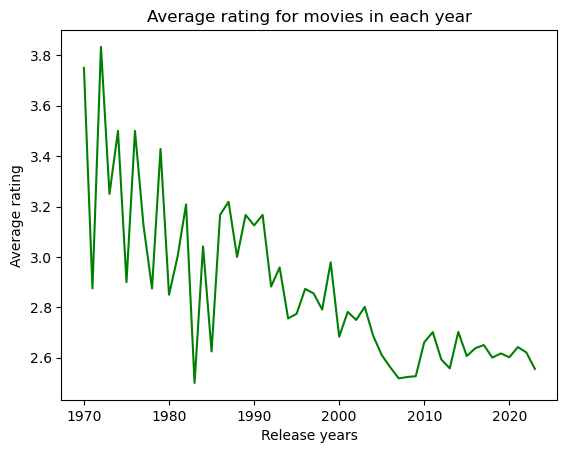

In [202]:
# Average ratings grouped by year visualized as a line chart

year_order = year_dataframe.sort_values(by="Release Year", ascending=True)

plt.plot(year_order["Release Year"], year_order["Average Star Rating"], color="green")
plt.xlabel("Release years")
plt.ylabel("Average rating")
plt.title("Average rating for movies in each year")
plt.show()

In [200]:
# Using an earlier dictionary to find the count of movies featuring each mpaa rating category 
# and converting them to a data frame to show the 10 most frequent mpaa rating categories.

year_count = []

for i in years_mov_count.keys():
    year_count.append(years_mov_count[i][1])
    
year_count_dataframe = pd.DataFrame.from_dict({"Release Year": years_mov_count.keys(), 
                                                 "Movie count": year_count})

year_count_dataframe.sort_values(by="Movie count", ascending=False).iloc[:10,:]

,Release Year,Movie count
5,2007.0,194
3,2008.0,192
10,2018.0,184
18,2006.0,177
17,2017.0,173
2,2009.0,169
15,2005.0,158
1,2019.0,158
25,2010.0,158
7,2012.0,150


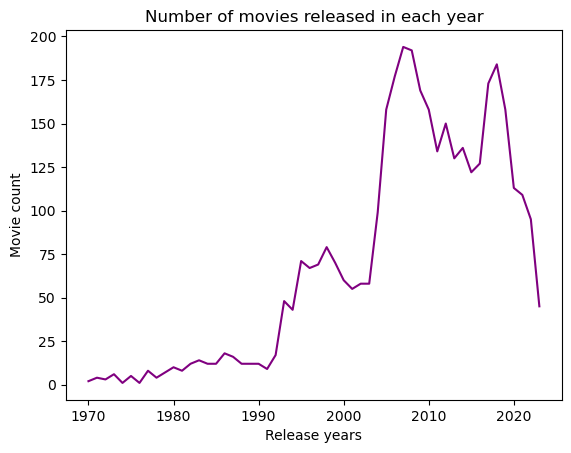

In [203]:
# Number of movies released grouped by year visualized as a line chart

year_order = year_count_dataframe.sort_values(by="Release Year", ascending=True)

plt.plot(year_order["Release Year"], year_order["Movie count"], color="purple")
plt.xlabel("Release years")
plt.ylabel("Movie count")
plt.title("Number of movies released in each year")
plt.show()

### It is clear that since there are lesser movies released between 1970 to 2000, we cannot make a definite conclusion that the movies released after 2000 are lesser rated than the movies released before 2000, as indicated by the first graph.

### But as can be seen in the above graph, **more movies have been released in the years from 2000 onwards** compared to the years before 2000.

---

## **4. Checking how the Movie Genre affects movie ratings**

In [205]:
# Creating a new dataframe that has no nulls in the mpaa_ratings column

df4 = df[~df['genre'].isna()]

In [222]:
#Extracting the different demographic ratings in the "genre" column

genres = set()

for i in df["genre"].dropna():
    start = 0
    for j in range(len(i)):
        if i[j] == "/" or j == len(i) - 1:
            sr = i[start:j+1].lower()
            sr1 = ""
            for k in sr:
                if k.isalpha() or k != "/" or k in [" ", "-", "&", ";"]:
                    sr1 += k
            if sr1.strip() != " ":
                genres.add(sr1.strip())
            start = j
print(genres)

{'romantic comedy', 'mystery', 'war thriller', 'family drama', 'war', 'aventure', 'dram', 'romantic', 'comedy', 'family adventure', 'action comedy', 'horror', '1:59', 'fantasy adventure', 'family', 'silent', 'animated comedy', 'drama', 'western', 'family comedy', 'sci-fi', 'romantic drama', 'sports', 'drma', 'action thriller', 'musical', 'animated', 'action', 'sports drama', 'romance', 'documentary', 'fantasy', 'variety', 'thriller', 'horror comedy', 'science fiction', 'adventure'}


In [245]:
#There is unclean and repeated genres, so they shall be removed from the list
#The rest of the genres are added to a list for reference

genres_unq = []

for i in genres:
    if i not in ["dram", "drma", "aventure"]:
        genres_unq.append(i)
    
print("Total number of genres is:", len(genres_unq))
genres_unq.sort()
genres_unq

Total number of genres is: 34


['1:59',
 'action',
 'action comedy',
 'action thriller',
 'adventure',
 'animated',
 'animated comedy',
 'comedy',
 'documentary',
 'drama',
 'family',
 'family adventure',
 'family comedy',
 'family drama',
 'fantasy',
 'fantasy adventure',
 'horror',
 'horror comedy',
 'musical',
 'mystery',
 'romance',
 'romantic',
 'romantic comedy',
 'romantic drama',
 'sci-fi',
 'science fiction',
 'silent',
 'sports',
 'sports drama',
 'thriller',
 'variety',
 'war',
 'war thriller',
 'western']

In [246]:
#creating a dictionary that lists the count and sum of ratings of all movies that feature each genre

avg_rating_genre = {}

for i in genres_unq:
    movs = set()
    for j in df4.index:
        if i.lower() in df4["genre"][j].lower():
            if i not in avg_rating_genre.keys():
                avg_rating_genre[i] = [df4["stars_rating"][j], 1]
            else:
                avg_rating_genre[i] = [avg_rating_genre[i][0] + df4["stars_rating"][j], avg_rating_genre[i][1] + 1]
print(avg_rating_genre)

{'1:59': [2.5, 1], 'action': [1136.0, 468], 'action comedy': [3.0, 2], 'action thriller': [5.5, 2], 'adventure': [1025.0, 383], 'animated': [520.0, 179], 'animated comedy': [3.0, 1], 'comedy': [2346.0, 932], 'documentary': [233.0, 77], 'drama': [4351.0, 1499], 'family': [31.5, 12], 'family adventure': [8.0, 3], 'family comedy': [2.5, 1], 'family drama': [2.5, 1], 'fantasy': [390.5, 147], 'fantasy adventure': [6.0, 2], 'horror': [708.5, 304], 'horror comedy': [2.5, 1], 'musical': [231.5, 84], 'mystery': [32.5, 12], 'romance': [598.5, 227], 'romantic': [74.5, 28], 'romantic comedy': [68.5, 26], 'romantic drama': [3.0, 1], 'sci-fi': [10.5, 4], 'science fiction': [750.0, 285], 'silent': [3.5, 1], 'sports': [8.0, 3], 'sports drama': [3.0, 1], 'thriller': [2134.5, 786], 'variety': [1.0, 1], 'war': [95.0, 29], 'war thriller': [3.5, 1], 'western': [80.5, 25]}


In [247]:
#Creating a new dictionary that stores the average ratings of each genre

avg_genre_dataframe = {}

for i in avg_rating_genre.keys():
    avg_genre_dataframe[i] = float(avg_rating_genre[i][0]) / float(avg_rating_genre[i][1])
    
#avg_genre_dataframe

In [248]:
#converting the above dictionary to a data frame and displaying the data frame in descending order of average ratings

genre_dataframe = pd.DataFrame.from_dict({"Genre": avg_genre_dataframe.keys(), 
                                                 "Average Star Rating": avg_genre_dataframe.values()})
genre_dataframe.sort_values(by="Average Star Rating", ascending=False)

,Genre,Average Star Rating
26,silent,3.500000
32,war thriller,3.500000
31,war,3.275862
33,western,3.220000
8,documentary,3.025974
23,romantic drama,3.000000
6,animated comedy,3.000000
28,sports drama,3.000000
15,fantasy adventure,3.000000
5,animated,2.905028


### From the above table, we can see that the "war thriller", "silent" and "war" have the higher average rating

In [249]:
# Top 10 highest average ratings grouped by genre

genre_dataframe.sort_values(by="Average Star Rating", ascending=False).iloc[:10,:]

,Genre,Average Star Rating
26,silent,3.500000
32,war thriller,3.500000
31,war,3.275862
33,western,3.220000
8,documentary,3.025974
23,romantic drama,3.000000
6,animated comedy,3.000000
28,sports drama,3.000000
15,fantasy adventure,3.000000
5,animated,2.905028


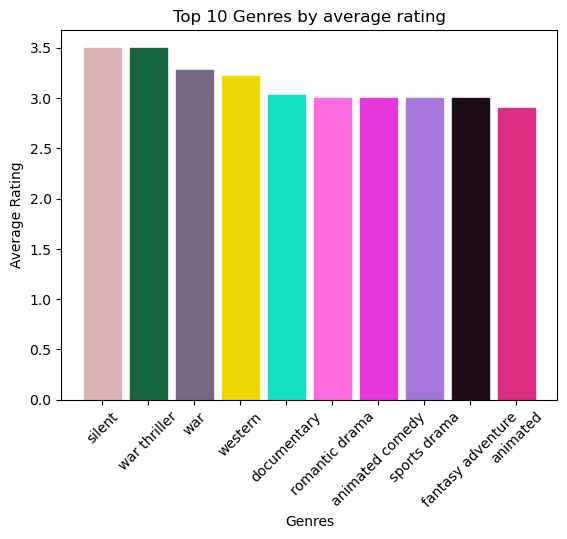

In [250]:
# Top 10 highest average ratings grouped by genre visualized as a bar chart

genre_dataframe_top10 = genre_dataframe.sort_values(by="Average Star Rating", ascending=False).iloc[:10,:]

bars3 = plt.bar(genre_dataframe_top10["Genre"], genre_dataframe_top10["Average Star Rating"])

hexadecimal_alphabets = '0123456789ABCDEF'
colors = ["#" + ''.join([random.choice(hexadecimal_alphabets) for j in range(6)]) for i in range(10)]

for i in range(len(colors)):
   bars3[i].set_color(colors[i])

plt.title("Top 10 Genres by average rating")
plt.xlabel("Genres")
plt.ylabel("Average Rating")
plt.xticks(rotation = 45)
plt.show()

### To compare this with the number of movies involving each Genre:

In [251]:
# Using an earlier dictionary to find the count of movies featuring each genre
# and converting them to a data frame to show the 10 most frequent genres.

genre_count_n = []

for i in avg_rating_genre.keys():
    genre_count_n.append(avg_rating_genre[i][1])
    
genre_count_dataframe = pd.DataFrame.from_dict({"Genre": avg_rating_genre.keys(), 
                                                 "Movie count": genre_count_n})

genre_count_dataframe.sort_values(by="Movie count", ascending=False).iloc[:10,:]

,Genre,Movie count
9,drama,1499
7,comedy,932
29,thriller,786
1,action,468
4,adventure,383
16,horror,304
25,science fiction,285
20,romance,227
5,animated,179
14,fantasy,147


## Comparing the above table with the table of the top 10 genres, movies in the **Animation** genre appear to be both frequent as well as in the top 10, making animated movies a safer bet to a high rating movie. 

### (Here, I have made the assumption that all genres are similarly distributed thorught the movies making this analysis theoretical)